In [2]:
import os

weightsFolder = "/home/nicholas.farrow/public_html/gwInference/newROQ/run12/result/weightsRun_10/"

weightFiles = os.listdir(weightsFolder)
masterWeights = [file for file in weightFiles if 'master' in str(file)]
print(len(masterWeights))

1000


In [3]:
nSamplesPerMaster = 1

eccentricities = []
newLogLikelihood = []
logWeights = []

for weightFile in masterWeights:
   
    with open(weightsFolder + weightFile, 'r') as f:
        resultInfo = f.readlines()
        sampleResults = [res.strip().split('\t\t') for res in resultInfo[1:]]
        
        if len(sampleResults) == 0:
            continue
            
        if 'None' in sampleResults:
            continue

        for result in sampleResults:
            if 'None' in result:
                print("found none")
                continue
                
            #print(result)
            
            eccentricities.append(float(result[1]))
            newLogLikelihood.append(float(result[2]))
            logWeights.append(float(result[3]))
            
print(len(eccentricities))

found none
found none
found none
found none
966


In [56]:
print(max(logWeights))
print(np.exp(6.7))

6.730406504734675
812.4058251675433


837.4876394584068


(0, 2)

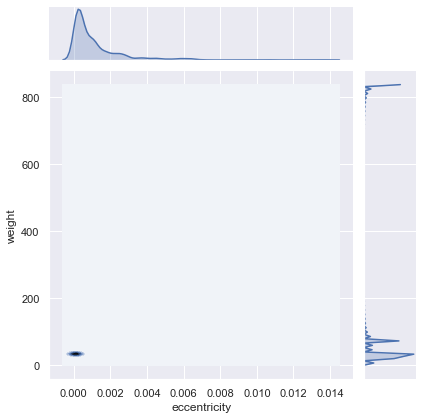

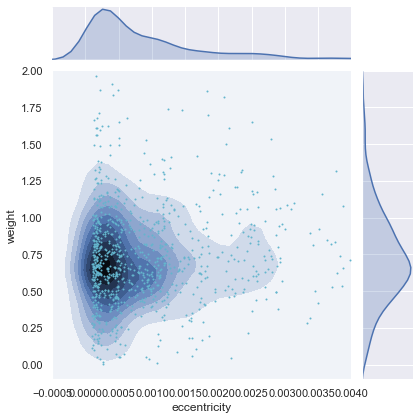

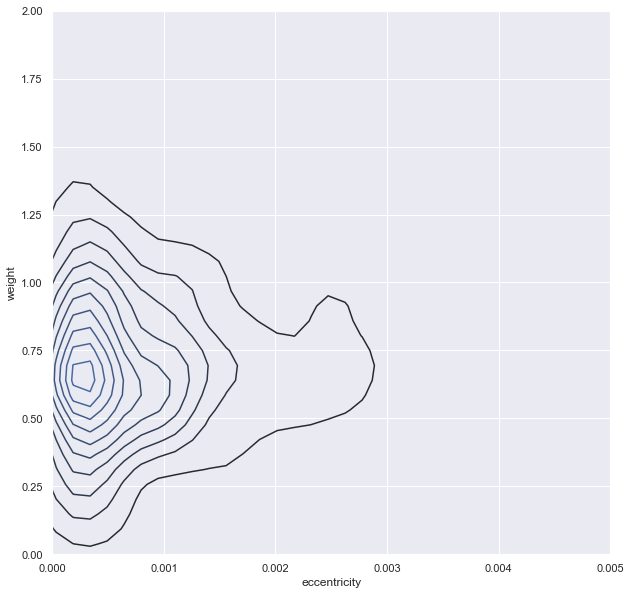

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

dataArray = np.array([np.asarray(eccentricities), np.exp(logWeights)]).T
df = pd.DataFrame(dataArray, columns=["eccentricity", "weight"])

print(max(df['weight']))


seabornPlot = sns.jointplot(x="eccentricity", y="weight", data=df, kind="kde")


dataNoOutliers = df[df['weight'] < 5]
seabornPlot = sns.jointplot(x="eccentricity", y="weight", data=dataNoOutliers, kind="kde", xlim=(-0.0005, 0.004), ylim=(-0.1, 2))
seabornPlot.plot_joint(plt.scatter, c="c", s=1, linewidth=1)#, marker="+")


f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(dataNoOutliers.eccentricity, dataNoOutliers.weight, ax=ax)
#sns.rugplot(dataNoOutliers.eccentricity, color="g", ax=ax)
#sns.rugplot(dataNoOutliers.weight, vertical=True, ax=ax)
plt.xlim(0, 0.005)
plt.ylim(0, 2)


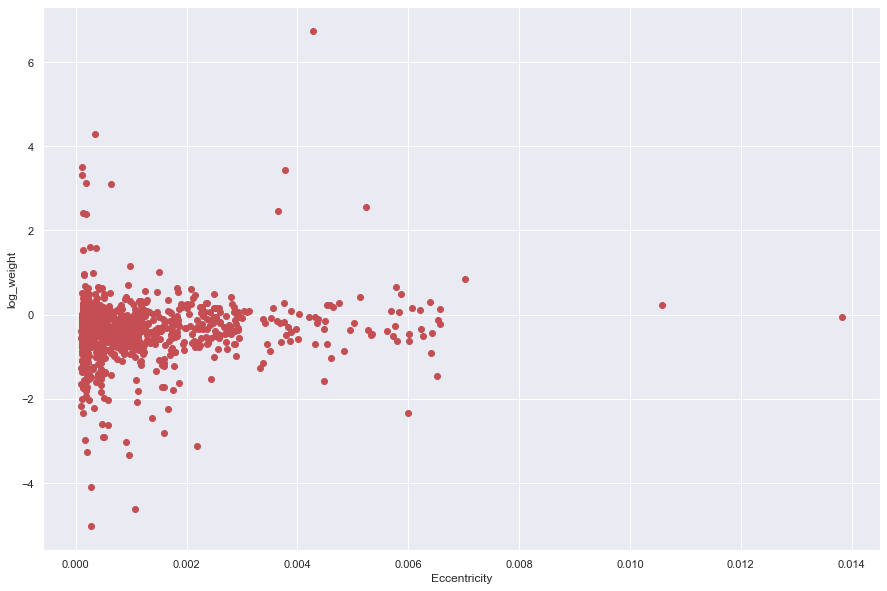

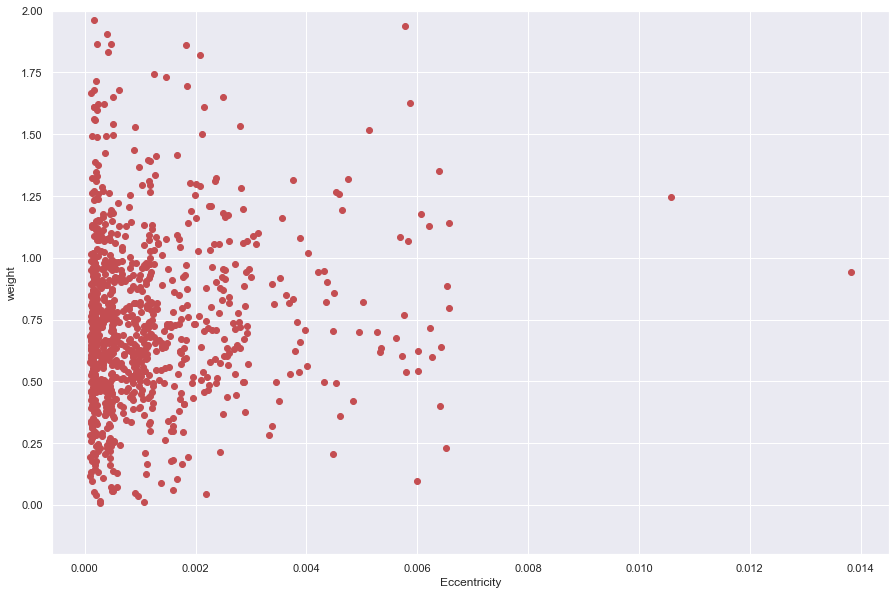

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde



plt.figure(figsize=(15,10))
plt.plot(eccentricities, logWeights, 'ro')
plt.xlabel('Eccentricity')
plt.ylabel('log_weight')
plt.show()



plt.figure(figsize=(15,10))
plt.plot(eccentricities, np.exp(logWeights), 'ro')
plt.xlabel('Eccentricity')
plt.ylabel('weight')
plt.ylim((-0.2, 2))
plt.show()



# nbins=700
# x = np.asarray(eccentricities)
# y = np.exp(logWeights)

# k = kde.gaussian_kde([x,y])
# xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
# zi = k(np.vstack([xi.flatten(), yi.flatten()]))
# plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
# plt.ylim((-0.1, 20))
# plt.show()
 
# plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
# plt.ylim((-0.1, 20))
# plt.show()




In [ ]:
plt.figure(figsize=(15,10))
plt.plot(eccentricities, np.exp(logWeights), 'ro')
plt.xlabel('Eccentricity')
plt.ylabel('log_weight')

# fit = np.polyfit(eccentricities, np.exp(logWeights), 1)
# fitfunc = np.poly1d(fit)
# plt.plot(eccentricities, fitfunc(eccentricities))

plt.ylim((0, 3))
plt.show()

* New log_likelihoods do not match well with old. eg, https://ldas-jobs.ligo.caltech.edu/~nicholas.farrow/gwInference/newROQ/run12/output/GW190425_9.out
    * redo with same fmin